In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
#import scipy
#import seaborn as sns

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1):
    i = 0
    # Random sampling
    all_files = os.listdir(in_folder)
    num_files = int(np.floor(len(all_files) * percent))
    chosen_files = random.sample(all_files, num_files)
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [3]:
df_0 = read_file('data/', percent=0.2) # 16 files

data/uk_obs_coordinates_000000000040
data/uk_obs_coordinates_000000000030
data/uk_obs_coordinates_000000000037
data/uk_obs_coordinates_000000000016
data/uk_obs_coordinates_000000000076
data/uk_obs_coordinates_000000000083
data/uk_obs_coordinates_000000000055
data/uk_obs_coordinates_000000000035
data/uk_obs_coordinates_000000000061
data/uk_obs_coordinates_000000000045
data/uk_obs_coordinates_000000000050
data/uk_obs_coordinates_000000000042
data/uk_obs_coordinates_000000000062
data/uk_obs_coordinates_000000000069
data/uk_obs_coordinates_000000000004
data/uk_obs_coordinates_000000000011
Number of files: {} 1


In [4]:
df_0.shape

(54301917, 6)

In [5]:
df_0['Level'].unique()

array(['2nd Floor', '1st Floor', 'Ground Floor', '3rd Floor'],
      dtype=object)

In [6]:
df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]

,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,2nd Floor,90:61:ae:25:a2:42,51.460620,-0.932410,2019-10-15 15:09:21.869 UTC
1,UK Office,2nd Floor,5c:f7:e6:e3:92:8c,51.460637,-0.932461,2019-10-15 15:09:21.869 UTC
2,UK Office,2nd Floor,88:66:a5:36:85:67,51.460643,-0.932460,2019-10-15 15:09:21.869 UTC
3,UK Office,2nd Floor,e8:de:27:9f:7f:0c,51.460615,-0.932380,2019-10-15 15:09:21.869 UTC
4,UK Office,2nd Floor,88:66:a5:10:be:cb,51.460637,-0.932461,2019-10-15 15:09:21.869 UTC
...,...,...,...,...,...,...
54301912,UK Office,1st Floor,e4:a7:a0:99:dc:ed,51.460476,-0.932768,2019-10-03 15:27:48.575 UTC
54301913,UK Office,1st Floor,88:66:a5:56:03:4c,51.460377,-0.932543,2019-10-03 15:27:48.574 UTC
54301914,UK Office,1st Floor,88:66:a5:0e:70:77,51.460463,-0.932998,2019-10-03 15:27:48.276 UTC
54301915,UK Office,1st Floor,5c:5f:67:8b:e2:64,51.460456,-0.932850,2019-10-03 15:27:48.276 UTC


### Data cleaning

In [7]:
## Clean data at 1st - 3rd floor 
df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 54301917


,index,Site,Level,ClientMacAddr,lat,lng,localtime
24711529,54301911,UK Office,1st Floor,48:45:20:37:e8:b7,51.460482,-0.932770,2019-10-03 15:27:48.575 UTC
24711530,54301912,UK Office,1st Floor,e4:a7:a0:99:dc:ed,51.460476,-0.932768,2019-10-03 15:27:48.575 UTC
24711531,54301914,UK Office,1st Floor,88:66:a5:0e:70:77,51.460463,-0.932998,2019-10-03 15:27:48.276 UTC
24711532,54301915,UK Office,1st Floor,5c:5f:67:8b:e2:64,51.460456,-0.932850,2019-10-03 15:27:48.276 UTC
24711533,54301916,UK Office,1st Floor,9c:8c:6e:46:1c:5e,51.460467,-0.932975,2019-10-03 15:27:48.276 UTC


In [8]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


,index,Site,Level,ClientMacAddr,lat,lng,localtime
20766909,54301884,UK Office,1st Floor,48:45:20:37:c0:a3,51.460959,-0.932292,2019-10-03 15:27:49.278 UTC
20766910,54301885,UK Office,1st Floor,a4:c3:f0:a5:f0:f0,51.460951,-0.932286,2019-10-03 15:27:49.278 UTC
20766911,54301889,UK Office,1st Floor,5c:5f:67:8b:e1:b5,51.460795,-0.932229,2019-10-03 15:27:49.275 UTC
20766912,54301893,UK Office,1st Floor,c4:6e:1f:1b:4f:c0,51.460851,-0.932247,2019-10-03 15:27:49.271 UTC
20766913,54301898,UK Office,1st Floor,98:10:e8:3a:8a:6e,51.460689,-0.932237,2019-10-03 15:27:49.078 UTC


In [9]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 45478448


,Site,Level,ClientMacAddr,lat,lng,localtime
0,UK Office,2nd Floor,4c:56:9d:75:d1:e5,51.460430,-0.933121,2019-10-15 15:09:20.276 UTC
1,UK Office,2nd Floor,0c:51:01:c9:bc:12,51.460463,-0.932865,2019-10-15 15:09:19.865 UTC
2,UK Office,2nd Floor,9c:da:3e:7f:8e:06,51.460487,-0.932867,2019-10-15 15:09:19.865 UTC
3,UK Office,2nd Floor,48:45:20:4c:11:89,51.460444,-0.932899,2019-10-15 15:09:19.865 UTC
4,UK Office,2nd Floor,60:30:d4:56:42:e3,51.460465,-0.932899,2019-10-15 15:09:19.865 UTC
5,UK Office,2nd Floor,c4:6e:1f:1a:68:a1,51.460475,-0.932844,2019-10-15 15:09:19.865 UTC
6,UK Office,2nd Floor,98:10:e8:3a:2b:f0,51.460417,-0.932971,2019-10-15 15:09:19.865 UTC
7,UK Office,2nd Floor,00:b3:62:26:0c:71,51.460456,-0.932874,2019-10-15 15:09:19.865 UTC
8,UK Office,2nd Floor,e4:a7:a0:99:de:28,51.460465,-0.932909,2019-10-15 15:09:19.865 UTC
9,UK Office,2nd Floor,64:a2:f9:30:4f:8c,51.460432,-0.932705,2019-10-15 15:09:19.675 UTC


In [66]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 2190304
# rows after cleaning: 1773634


In [11]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 45478448


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45478448 entries, 0 to 45478447
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 2.0+ GB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [13]:
df['localtime'] = df['localtime'].astype('datetime64[ns]')
df['date']  = df['localtime'].dt.date
df['day']   = df['localtime'].dt.day

,Site,Level,ClientMacAddr,lat,lng,localtime,date,day,month,year,time,dayOfWeek,IsWeekend
0,UK Office,2nd Floor,4c:56:9d:75:d1:e5,51.460430,-0.933121,2019-10-15 15:09:20.276,2019-10-15,15,10,2019,15:09:20,1,False
1,UK Office,2nd Floor,0c:51:01:c9:bc:12,51.460463,-0.932865,2019-10-15 15:09:19.865,2019-10-15,15,10,2019,15:09:19,1,False
2,UK Office,2nd Floor,9c:da:3e:7f:8e:06,51.460487,-0.932867,2019-10-15 15:09:19.865,2019-10-15,15,10,2019,15:09:19,1,False
3,UK Office,2nd Floor,48:45:20:4c:11:89,51.460444,-0.932899,2019-10-15 15:09:19.865,2019-10-15,15,10,2019,15:09:19,1,False
4,UK Office,2nd Floor,60:30:d4:56:42:e3,51.460465,-0.932899,2019-10-15 15:09:19.865,2019-10-15,15,10,2019,15:09:19,1,False


In [ ]:
df['month'] = df['localtime'].dt.month
df['year']  = df['localtime'].dt.year
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
df.head()

In [14]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-08-12
2020-09-01


## TODO:
- Change from days to percentage to identify the fixed device

## Frequency in days

In [15]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

,ClientMacAddr,total_day,total_signal
0,00:00:00:00:00:00,4,94
1,00:06:c6:5a:a2:51,1,13
2,00:06:c6:92:a5:c1,1,13
3,00:07:88:d8:94:64,2,28
4,00:08:22:24:b7:fb,1,11
...,...,...,...
32997,fc:b6:d8:b2:7a:56,2,26
32998,fc:c2:de:47:8b:fc,1,89
32999,fc:d8:48:80:ab:de,1,254
33000,fc:db:b3:30:28:c9,2,14


In [16]:
# Frequency in days
frequency['total_day'].value_counts()

1      22945
2       4111
3       1939
4        827
5        523
       ...  
162        1
71         1
87         1
116        1
74         1
Name: total_day, Length: 84, dtype: int64

## Weekend & Weekday

In [17]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

,ClientMacAddr,IsWeekend,Days
0,00:00:00:00:00:00,False,4
1,00:06:c6:5a:a2:51,False,1
2,00:06:c6:92:a5:c1,False,1
3,00:07:88:d8:94:64,False,2
4,00:08:22:24:b7:fb,False,1
...,...,...,...
33152,fc:b6:d8:b2:7a:56,False,2
33153,fc:c2:de:47:8b:fc,False,1
33154,fc:d8:48:80:ab:de,False,1
33155,fc:db:b3:30:28:c9,False,2


In [18]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
df_weekday

,ClientMacAddr,Days
27549,88:66:a5:45:b9:ea,116
28460,8c:f5:a3:cd:d2:db,116
13023,78:00:9e:93:6a:d0,111
758,0c:70:4a:a2:6d:e7,85
28829,98:10:e8:3b:48:e3,82
...,...,...
17584,80:58:f8:4d:f7:96,1
17583,80:58:f8:4d:ec:d5,1
17582,80:58:f8:4d:ec:8b,1
17581,80:58:f8:4d:ec:4e,1


In [19]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

,ClientMacAddr,Days
27550,88:66:a5:45:b9:ea,46
6241,48:a4:72:ae:11:81,24
33111,fc:03:9f:07:af:f4,22
256,00:c2:c6:f9:2f:9f,21
390,04:ea:56:92:f9:9b,21
...,...,...
28701,95:38:c1:9f:67:ae,1
6441,50:eb:71:e8:7d:e9,1
6467,58:20:b1:5d:8a:8d,1
6489,58:c5:cb:5b:3f:d7,1


In [38]:
df_temp.describe()

,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend
count,33002.000000,33002.000000,33002.000000,33002.000000,33002.000000,33002.000000,33002.00000,33002.000000,33002.000000
mean,51.460736,51.460624,-0.932405,-0.932556,22.041522,2.570117,1378.05127,2.545664,0.024453
std,0.000174,0.000178,0.000232,0.000311,35.295509,5.469586,10282.14919,5.302731,0.524577
min,51.460382,51.460381,-0.933231,-0.933236,0.000000,1.000000,1.00000,0.000000,0.000000
25%,51.460598,51.460449,-0.932396,-0.932788,0.000000,1.000000,13.00000,1.000000,0.000000
50%,51.460786,51.460626,-0.932348,-0.932396,0.905562,1.000000,13.00000,1.000000,0.000000
75%,51.460900,51.460786,-0.932243,-0.932362,30.029007,2.000000,27.00000,2.000000,0.000000
max,51.460960,51.460960,-0.932221,-0.932221,129.850623,162.000000,605589.00000,116.000000,46.000000


In [20]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

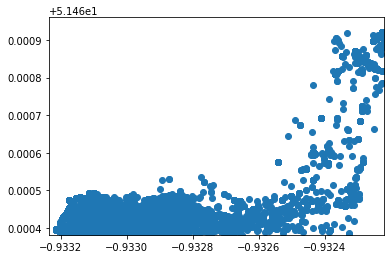

In [37]:
# Plot ClientMacAddr: 9c:8c:6e:46:0b:7c
# 50 weekend days
person1 = df[df['ClientMacAddr']=='98:10:e8:08:59:92']
plt.scatter(person1['lng'], person1['lat'])
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.show()

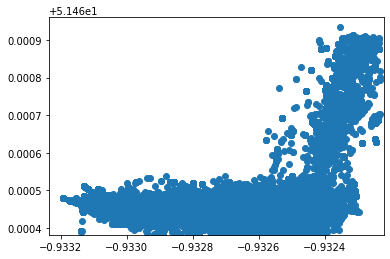

In [22]:
person2 = df[df['ClientMacAddr']=='88:66:a5:45:b9:ea']
plt.scatter(person2['lng'], person2['lat'])
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
plt.show()

88:66:a5:45:b9:ea
123.31502514850725


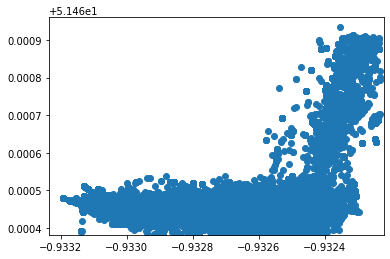

48:a4:72:ae:11:81
45.24252283768403


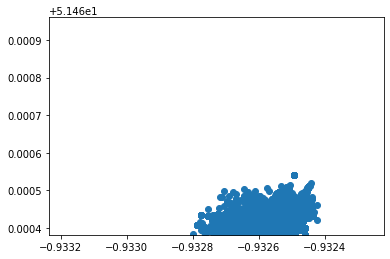

fc:03:9f:07:af:f4
67.85108656018863


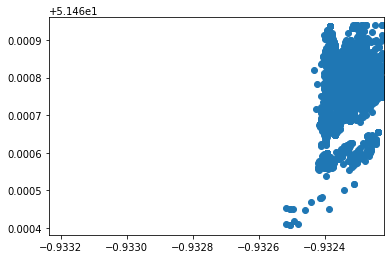

00:c2:c6:f9:2f:9f
75.66635048865751


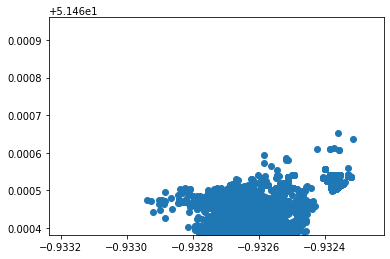

04:ea:56:92:f9:9b
77.76939519877938


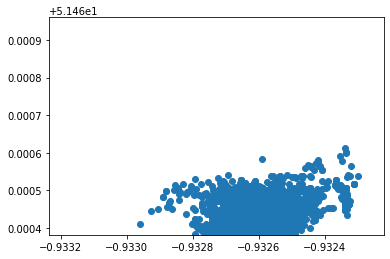

00:23:a7:e7:96:0c
96.61419906310685


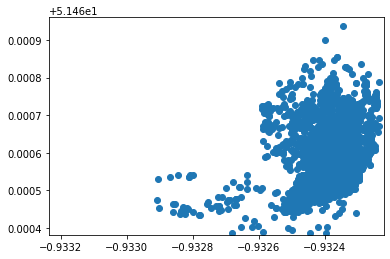

98:10:e8:3a:c9:e4
121.88776385459833


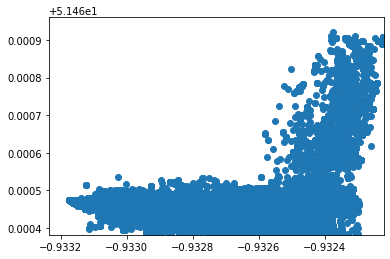

04:d6:aa:88:5d:e1
128.25580712046386


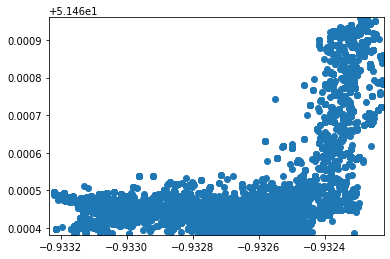

c4:6e:1f:1c:f2:9b
95.04395734014294


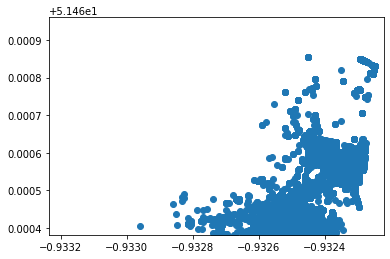

ec:ad:b8:7d:23:e8
83.28085426800101


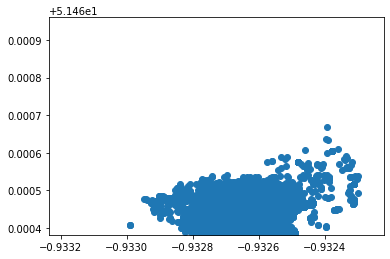

In [23]:
# Distance
weekend_guy = np.array(df_weekend['ClientMacAddr'].head(10))
for i in weekend_guy:
    person = df[df['ClientMacAddr'] == i ]
    print(i)
    person_min_lng = min(person['lng'])
    person_max_lng = max(person['lng'])
    person_min_lat = min(person['lat'])
    person_max_lat = max(person['lat'])
    person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
    print(person_distance)
    plt.scatter(person['lng'], person['lat'])
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.show()

In [24]:
# Distribution for max distance
temp1 = df.groupby('ClientMacAddr')['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby('ClientMacAddr')['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on='ClientMacAddr')
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal
1059,24:1b:7a:1b:eb:ba,51.460960,51.460382,-0.932221,-0.933236,129.850623,26,17162
29752,bc:9f:ef:12:17:ff,51.460960,51.460382,-0.932221,-0.933236,129.837204,55,46573
781,10:02:b5:e3:09:81,51.460960,51.460382,-0.932221,-0.933235,129.761939,18,32981
944,1c:1b:b5:05:0a:14,51.460960,51.460382,-0.932221,-0.933234,129.659790,14,37060
6724,5c:f7:e6:e6:3b:88,51.460957,51.460382,-0.932221,-0.933235,129.595609,40,43180
...,...,...,...,...,...,...,...,...
13780,80:58:f8:0a:13:57,51.460913,51.460913,-0.932370,-0.932370,0.000000,1,13
13778,80:58:f8:0a:04:da,51.460392,51.460392,-0.932495,-0.932495,0.000000,1,12
13777,80:58:f8:0a:04:b6,51.460718,51.460718,-0.932396,-0.932396,0.000000,1,12
13776,80:58:f8:0a:04:24,51.460786,51.460786,-0.932225,-0.932225,0.000000,1,12


In [39]:
# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend
0,00:00:00:00:00:00,51.460534,51.460409,-0.932546,-0.933004,52.736820,4,94,4.0,0.0
1,00:06:c6:5a:a2:51,51.460785,51.460768,-0.932337,-0.932347,2.244888,1,13,1.0,0.0
2,00:06:c6:92:a5:c1,51.460467,51.460465,-0.933132,-0.933136,0.490026,1,13,1.0,0.0
3,00:07:88:d8:94:64,51.460832,51.460713,-0.932223,-0.932328,17.646167,2,28,2.0,0.0
4,00:08:22:24:b7:fb,51.460696,51.460633,-0.932276,-0.932314,8.172743,1,11,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32997,fc:b6:d8:b2:7a:56,51.460938,51.460823,-0.932324,-0.932372,13.864901,2,26,2.0,0.0
32998,fc:c2:de:47:8b:fc,51.460467,51.460394,-0.932642,-0.933163,58.422409,1,89,1.0,0.0
32999,fc:d8:48:80:ab:de,51.460513,51.460425,-0.932657,-0.933054,45.157559,1,254,1.0,0.0
33000,fc:db:b3:30:28:c9,51.460880,51.460836,-0.932257,-0.932409,17.575963,2,14,2.0,0.0


In [40]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32625 entries, 0 to 33001
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientMacAddr    32625 non-null  object 
 1   max_lat          32625 non-null  float64
 2   min_lat          32625 non-null  float64
 3   max_lng          32625 non-null  float64
 4   min_lng          32625 non-null  float64
 5   Distance(Meter)  32625 non-null  float64
 6   total_day        32625 non-null  int64  
 7   total_signal     32625 non-null  int64  
 8   Weekday          32625 non-null  float64
 9   Weekend          32625 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

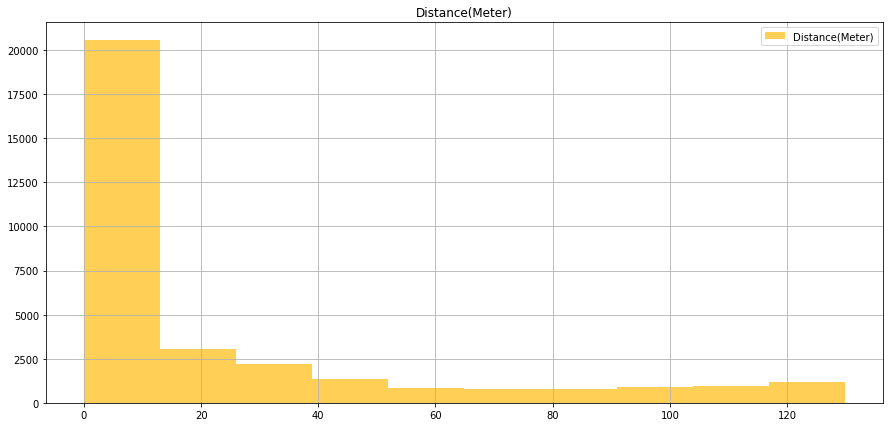

In [54]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

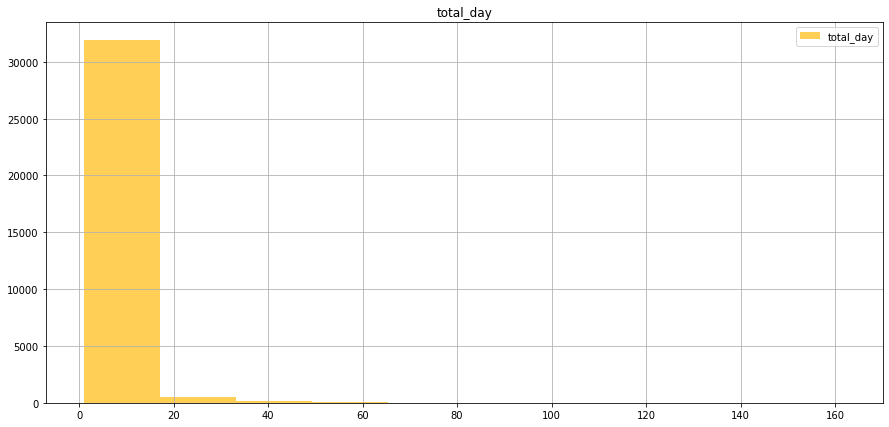

In [63]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=10)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

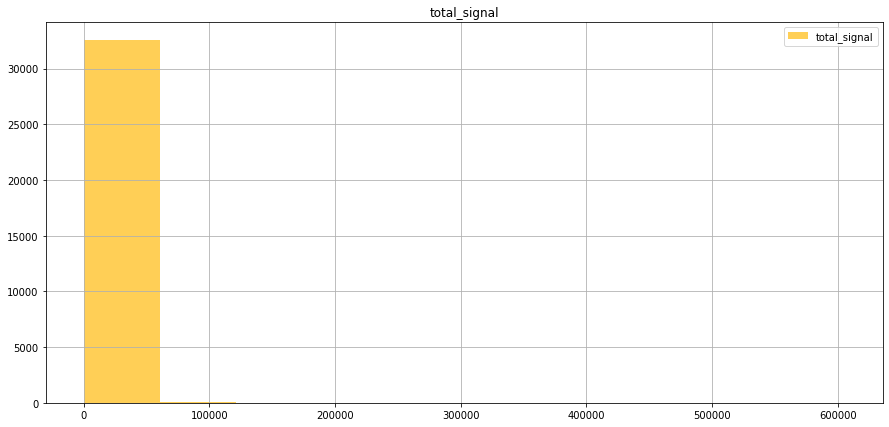

In [56]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [64]:
df_temp.describe()

,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend
count,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000,32625.000000
mean,51.460737,51.460624,-0.932404,-0.932557,22.296224,2.588261,1393.963862,2.563648,0.024613
std,0.000173,0.000178,0.000231,0.000311,35.418779,5.498479,10340.316550,5.330616,0.527483
min,51.460382,51.460381,-0.933231,-0.933236,0.000000,1.000000,2.000000,0.000000,0.000000
25%,51.460598,51.460449,-0.932396,-0.932794,0.000000,1.000000,13.000000,1.000000,0.000000
50%,51.460786,51.460626,-0.932347,-0.932396,1.148873,1.000000,13.000000,1.000000,0.000000
75%,51.460900,51.460786,-0.932243,-0.932362,30.679037,2.000000,27.000000,2.000000,0.000000
max,51.460960,51.460960,-0.932221,-0.932221,129.850623,162.000000,605589.000000,116.000000,46.000000


## Define the characteristics of Mac ID

Fixed device:
1. Distance < 45 meters
2. Frequency in days >= 5 days / a year
3. Contain data in weekends
4. TODO: Data present whole days
5. TODO: High density: low variance

Mobile device:
1. Distance >= 45 meters 

TODO: 
 - Security guard: 
 1. Night shift
 2. Frequency in days > 5
 3. Contain data in weekend
 - Employee:
 1. Frequency in days > 5
 2. No weekends
 - Visitors:
 1. Frequency in days <= 5
 2. No weekends

In [72]:
# Distribution for max distance
temp1 = df.groupby(['ClientMacAddr', 'date'])['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby(['ClientMacAddr', 'date'])['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on=['ClientMacAddr', 'date'])
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp.sort_values(['ClientMacAddr', 'date', 'Distance(Meter)'], ascending = [True, True, False])

,ClientMacAddr,max_lat,min_lat,max_lng,min_lng,Distance(Meter),total_day,total_signal,Weekday,Weekend,Job function
0,00:00:00:00:00:00,51.460534,51.460409,-0.932546,-0.933004,52.736820,4,94,4.0,0.0,Mobile Device
1,00:06:c6:5a:a2:51,51.460785,51.460768,-0.932337,-0.932347,2.244888,1,13,1.0,0.0,Mobile Device
2,00:06:c6:92:a5:c1,51.460467,51.460465,-0.933132,-0.933136,0.490026,1,13,1.0,0.0,Mobile Device
3,00:07:88:d8:94:64,51.460832,51.460713,-0.932223,-0.932328,17.646167,2,28,2.0,0.0,Mobile Device
4,00:08:22:24:b7:fb,51.460696,51.460633,-0.932276,-0.932314,8.172743,1,11,1.0,0.0,Mobile Device
...,...,...,...,...,...,...,...,...,...,...,...
32997,fc:b6:d8:b2:7a:56,51.460938,51.460823,-0.932324,-0.932372,13.864901,2,26,2.0,0.0,Mobile Device
32998,fc:c2:de:47:8b:fc,51.460467,51.460394,-0.932642,-0.933163,58.422409,1,89,1.0,0.0,Mobile Device
32999,fc:d8:48:80:ab:de,51.460513,51.460425,-0.932657,-0.933054,45.157559,1,254,1.0,0.0,Mobile Device
33000,fc:db:b3:30:28:c9,51.460880,51.460836,-0.932257,-0.932409,17.575963,2,14,2.0,0.0,Mobile Device


In [73]:
temp['ClientMacAddr'].value_counts()

Mobile Device    32612
Fixed Device        13
Name: Job function, dtype: int64

In [ ]:
# Group by Date and average the distance
df_temp = temp.groupby('ClientMacAddr')['Distance(Meter)'].mean().reset_index()
df_temp

In [ ]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Job function'] = 'Fixed Device'
df_temp

In [ ]:
Fix_device = df_temp[df_temp['Job function']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False).head(10)
Fix_device

In [ ]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]

# print(top10_fix)
import seaborn as sns
for i in Fix_device_pattern:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=df, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
import seaborn as sns
top10_fix = np.array(Fix_device['ClientMacAddr'])
Fix_device_pattern = df[df['ClientMacAddr'].isin(top10_fix)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(Fix_device_pattern, col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()


In [ ]:
# Mobile device
Mobile_device = df_temp[df_temp['Job function']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False).head(10)
Mobile_device

In [ ]:
# Assign color for different days
top10_mobile = np.array(Mobile_device['ClientMacAddr'])
Mobile_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]

# print(top10_fix)
import seaborn as sns
for i in Mobile_device_pattern:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=df, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
import seaborn as sns
top10_mobile = np.array(Mobile_device['ClientMacAddr'])
Mobile_device_pattern = df[df['ClientMacAddr'].isin(top10_mobile)]
# print(Fix_device_pattern)

# Plot
g = sns.FacetGrid(Mobile_device_pattern, col="ClientMacAddr", hue="date")
g.map(sns.scatterplot, "lng", "lat", alpha=.7)
plt.xlim([min_lng, max_lng])
plt.ylim([min_lat, max_lat])
g.add_legend()

In [ ]:
# Add total day and signal
df_temp = df_temp.merge(frequency, on='ClientMacAddr')
df_temp

In [ ]:
# Add Weekdays and Weekend
df_temp = df_temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})
df_temp

In [ ]:
# Define the Job function
df_temp['Job function'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<10, 'Job function'] = 'Fixed Device'
df_temp

In [ ]:
df_temp['Job function'].value_counts()

In [ ]:
# Distribution of distance
import seaborn as sns
sns.distplot(df_temp['Distance(Meter)'])

In [ ]:
sns.distplot(df_temp['total_day'])

In [ ]:
sns.distplot(df_temp['total_signal'])